In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# File path on my local machine
#filepath = '../csv/long_traces_June07_2022/12mus_25MHzSr_1kpts_10mVperdiv_ch4_44.135Bias/'
filepath = '../csv/long_traces_June08_2022/'
filename = 'wvfm_25MHzSR_44.134VBias_10msPerDiv_2.5Mpts_000_ALL.csv'

#traces = np.loadtxt(filepath+filename,delimiter=',', skiprows=10)
df = pd.read_csv(filepath+filename, skiprows=10)
df.head()
# Factors of 10 convert s to mus and V to mV
#trace_time = traces[:,0]
#voltage    = traces[:,1]

,TIME,CH1,CH2,CH3,CH4
0,-0.04,0.007906,-0.002087,-0.000572,0.001872
1,-0.04,-0.012828,-0.002719,-0.002259,-0.000200
2,-0.04,-0.006797,-0.004700,0.000750,-0.001222
3,-0.04,-0.004516,-0.003025,0.001375,-0.002006
4,-0.04,-0.006063,-0.002559,0.001356,0.000441


Model	MSO44

Waveform Type	ANALOG

Horizontal Units	s

Sample Interval	4.00E-08


Record Length	1000

Zero Index	142.772125

Vertical Units	V

ANALOG_Thumbnail	
	

Left window edge: -0.5710885
Right window edge: 0.42891150000000006
Window length in microseconds: 1.0


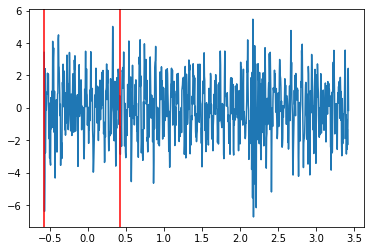

In [3]:
# Plot integration window for sanity check
# TODO Calculate steps_in_window rather than hard code
steps_in_window = 250
print('Left window edge:', trace_time[0])
print('Right window edge:', trace_time[steps_in_window])
print('Window length in microseconds:', trace_time[steps_in_window] - trace_time[0])
plt.plot(trace_time, voltage)
plt.axvline(trace_time[0], color='r')
plt.axvline(trace_time[steps_in_window], color='r')

In [4]:
# Integrate in window of length 1 microsecond in steps of 40 ns
#print(trace_time)
integrals = []
for i in range(0, len(trace_time)-steps_in_window):
    # Factor of 1e3 converts microseconds to nanoseconds 
    # Factor of 1e-3 converts mV to V
    integrals.append(np.trapz(voltage[i:i+steps_in_window]*1e-3, x=trace_time[i:i+steps_in_window])*1e3)
    if integrals[i] > 2: # 2 ns*V indicates single photon peak
        print('Hey look a thing')